In [45]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("measurements-march.csv")
print(df.shape)
print(df.head())

(66615, 12)
         id  container_id         code  percent_calculated  upturned  \
0  11678631         30133  S0133C01336                  53         0   
1  11677936         30133  S0133C01336                  53         0   
2  11676616         30133  S0133C01336                  53         0   
3  11675949         30142  S0135C01353                  32         0   
4  11675836         30040  S0050C00502                  64         0   

   temperature  battery_status               measured_at  \
0           25            3.74  2019-03-30T23:09:29.000Z   
1           26            3.74  2019-03-30T21:09:29.000Z   
2           26            3.74  2019-03-30T19:09:28.000Z   
3           15            3.77  2019-03-30T18:00:17.000Z   
4           14            3.60  2019-03-30T17:56:09.000Z   

            measured_at_utc                prediction  \
0  2019-03-30T23:09:29.000Z  2019-05-13T12:39:17.000Z   
1  2019-03-30T21:09:29.000Z  2019-05-13T12:39:17.000Z   
2  2019-03-30T19:09:28.

In [155]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66615 entries, 0 to 66614
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  66615 non-null  int64  
 1   container_id        66615 non-null  int64  
 2   code                66615 non-null  object 
 3   percent_calculated  66615 non-null  int64  
 4   upturned            66615 non-null  int64  
 5   temperature         66615 non-null  int64  
 6   battery_status      66615 non-null  float64
 7   measured_at         66615 non-null  object 
 8   measured_at_utc     66615 non-null  object 
 9   prediction          45608 non-null  object 
 10  prediction_utc      45608 non-null  object 
 11  firealarm           66615 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 6.1+ MB
None


In [150]:
# Prohlížení unikatních hodnot některých sloupců pro lepší porozumění datům
print(df["upturned"].unique()) 
print(df["firealarm"].unique()) 

[0 1]
[0]


In [156]:
# Změna datového typu na datetime
df["measured_at"] = pd.to_datetime(df["measured_at"])
df["measured_at_utc"] = pd.to_datetime(df["measured_at_utc"])
df["prediction"] = pd.to_datetime(df["prediction"])
df["prediction_utc"] = pd.to_datetime(df["prediction_utc"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66615 entries, 0 to 66614
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  66615 non-null  int64              
 1   container_id        66615 non-null  int64              
 2   code                66615 non-null  object             
 3   percent_calculated  66615 non-null  int64              
 4   upturned            66615 non-null  int64              
 5   temperature         66615 non-null  int64              
 6   battery_status      66615 non-null  float64            
 7   measured_at         66615 non-null  datetime64[ns, UTC]
 8   measured_at_utc     66615 non-null  datetime64[ns, UTC]
 9   prediction          45608 non-null  datetime64[ns, UTC]
 10  prediction_utc      45608 non-null  datetime64[ns, UTC]
 11  firealarm           66615 non-null  int64              
dtypes: datetime64[ns, UTC](4), float

In [152]:
# Zakladní statistiky
print(df.describe())

                 id  container_id  percent_calculated      upturned  \
count  6.661500e+04  66615.000000        66615.000000  66615.000000   
mean   1.141390e+07  30060.423838           55.669714      0.009442   
std    1.504700e+05    174.909198           31.707801      0.096712   
min    1.116182e+07  29786.000000            0.000000      0.000000   
25%    1.128076e+07  29925.000000           32.000000      0.000000   
50%    1.141118e+07  30030.000000           58.000000      0.000000   
75%    1.154445e+07  30148.000000           83.000000      0.000000   
max    1.167863e+07  30413.000000          100.000000      1.000000   

        temperature  battery_status  firealarm        time_diff  
count  66615.000000    66615.000000    66615.0                1  
mean       9.451340        3.626324        0.0  0 days 00:00:00  
std        4.084466        0.059252        0.0              NaT  
min      -12.000000        3.400000        0.0  0 days 00:00:00  
25%        7.000000        3.6

In [157]:
# Počet chybějících hodnot v každém sloupci
print(df.isnull().sum())
print(df.isnull().sum()/df.shape[0]*100)

id                        0
container_id              0
code                      0
percent_calculated        0
upturned                  0
temperature               0
battery_status            0
measured_at               0
measured_at_utc           0
prediction            21007
prediction_utc        21007
firealarm                 0
dtype: int64
id                     0.00000
container_id           0.00000
code                   0.00000
percent_calculated     0.00000
upturned               0.00000
temperature            0.00000
battery_status         0.00000
measured_at            0.00000
measured_at_utc        0.00000
prediction            31.53494
prediction_utc        31.53494
firealarm              0.00000
dtype: float64


In [159]:
# Kontrola duplicitních řádků
print(df.duplicated().sum()) 

# Zobrazit duplicitní řádky
duplicates = df[df.duplicated(keep=False)] 
print(duplicates)

# Zanechat jen jeden řádek ze dvou duplicitních
df_cleaned = df.drop_duplicates() 

df = df_cleaned

1
            id  container_id         code  percent_calculated  upturned  \
754   11671084         30051  S0052C00521                  41         0   
1039  11671084         30051  S0052C00521                  41         0   

      temperature  battery_status               measured_at  \
754            18             3.6 2019-03-30 13:02:49+00:00   
1039           18             3.6 2019-03-30 13:02:49+00:00   

               measured_at_utc                prediction  \
754  2019-03-30 13:02:49+00:00 2019-04-14 04:00:32+00:00   
1039 2019-03-30 13:02:49+00:00 2019-04-14 04:00:32+00:00   

                prediction_utc  firealarm  
754  2019-04-14 04:00:32+00:00          0  
1039 2019-04-14 04:00:32+00:00          0  


In [160]:
# Najít duplicitní id
duplicate_id = df[df["id"].duplicated(keep=False)]  # Select all duplicate rows

# Kontrola duplicitních id
if df["id"].is_unique:
    print("✅ The ID column is unique (no duplicates).")
else:
    print("❌ The ID column has duplicates!")
    print(duplicate_id)

✅ The ID column is unique (no duplicates).


In [162]:
gdf = gpd.read_file("containers.geojson")
print(gdf.head())
print(gdf.info())
print(gdf.describe())

      id         code   latitude  longitude        address district  \
0  29866  S0001C00011  50.088839  14.410216    Cihelná 548     None   
1  29867  S0001C00012  50.088839  14.410216    Cihelná 548     None   
2  29882  S0002C00021  50.090378  14.423075  Haštalská 748     None   
3  29883  S0002C00022  50.090378  14.423075  Haštalská 748     None   
4  29884  S0002C00023  50.090378  14.423075  Haštalská 748     None   

  postal_code  total_volume        trash_type                prediction  \
0       11000          3000           plastic                       NaT   
1       11000          3000             paper                       NaT   
2       11000          3000             paper                       NaT   
3       11000          3000           plastic 2019-04-13 22:39:24+00:00   
4       11000          1500  beverage_cartons                       NaT   

            bin_type              installed_at                   geometry  
0  Schäfer/Europa-OV 2018-12-18 00:00:00+00:00

In [163]:
# Počet chybějících hodnot v každém sloupci
print(gdf.isnull().sum())
print(gdf.isnull().sum()/gdf.shape[0]*100)

id                0
code              0
latitude          0
longitude         0
address           0
district        284
postal_code       0
total_volume      0
trash_type        0
prediction      112
bin_type          0
installed_at      6
geometry          0
dtype: int64
id               0.000000
code             0.000000
latitude         0.000000
longitude        0.000000
address          0.000000
district        66.981132
postal_code      0.000000
total_volume     0.000000
trash_type       0.000000
prediction      26.415094
bin_type         0.000000
installed_at     1.415094
geometry         0.000000
dtype: float64


In [164]:
# Kontrola duplicit
print(gdf.duplicated().sum()) 

# Zobrazit duplicitní řádky
duplicates = gdf[gdf.duplicated(keep=False)] 
print(duplicates)

# Zanechat jen jeden řádek ze dvou duplicitních
gdf_cleaned = gdf.drop_duplicates() 

0
Empty GeoDataFrame
Columns: [id, code, latitude, longitude, address, district, postal_code, total_volume, trash_type, prediction, bin_type, installed_at, geometry]
Index: []


In [165]:
# Najít duplicitní id
duplicate_id = gdf[gdf['id'].duplicated(keep=False)]  # Select all duplicate rows

# Kontrola duplicitních id
if gdf['id'].is_unique:
    print("✅ The ID column is unique (no duplicates).")
else:
    print("❌ The ID column has duplicates!")
    print(duplicate_id)

✅ The ID column is unique (no duplicates).


In [8]:
# Spojení tabulek 
data = df.merge(gdf, left_on="container_id", right_on="id", how="left")


In [166]:
# Kontrola výsledku
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66615 entries, 0 to 66614
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id_x                   66615 non-null  int64              
 1   container_id           66615 non-null  int64              
 2   code_x                 66615 non-null  object             
 3   percent_calculated     66615 non-null  int64              
 4   upturned               66615 non-null  int64              
 5   temperature            66615 non-null  int64              
 6   battery_status         66615 non-null  float64            
 7   measured_at            66615 non-null  object             
 8   measured_at_utc        66615 non-null  object             
 9   prediction_x           45608 non-null  object             
 10  prediction_utc         45608 non-null  object             
 11  firealarm              66615 non-null  int64          

In [32]:
# Získání unikátních hodnot ve sloupci 'trash_type'
unique_trash_types = data['trash_type'].unique()

# Výpis unikátních hodnot
print(unique_trash_types)

['metal' 'glass_coloured' 'plastic' 'paper' 'beverage_cartons'
 'glass_white']


In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66615 entries, 0 to 66614
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id_x                66615 non-null  int64              
 1   container_id        66615 non-null  int64              
 2   code_x              66615 non-null  object             
 3   percent_calculated  66615 non-null  int64              
 4   upturned            66615 non-null  int64              
 5   temperature         66615 non-null  int64              
 6   battery_status      66615 non-null  float64            
 7   measured_at         66615 non-null  object             
 8   measured_at_utc     66615 non-null  object             
 9   prediction_x        45608 non-null  object             
 10  prediction_utc      45608 non-null  object             
 11  firealarm           66615 non-null  int64              
 12  id_y                66615 non-nu

In [167]:
# Změna datovho typu na datetime
data["measured_at"] = pd.to_datetime(data["measured_at"])
data["measured_at_utc"] = pd.to_datetime(data["measured_at_utc"])
data["prediction_x"] = pd.to_datetime(data["prediction_x"])
data["prediction_utc"] = pd.to_datetime(data["prediction_utc"])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66615 entries, 0 to 66614
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id_x                   66615 non-null  int64              
 1   container_id           66615 non-null  int64              
 2   code_x                 66615 non-null  object             
 3   percent_calculated     66615 non-null  int64              
 4   upturned               66615 non-null  int64              
 5   temperature            66615 non-null  int64              
 6   battery_status         66615 non-null  float64            
 7   measured_at            66615 non-null  datetime64[ns, UTC]
 8   measured_at_utc        66615 non-null  datetime64[ns, UTC]
 9   prediction_x           45608 non-null  datetime64[ns, UTC]
 10  prediction_utc         45608 non-null  datetime64[ns, UTC]
 11  firealarm              66615 non-null  int64          

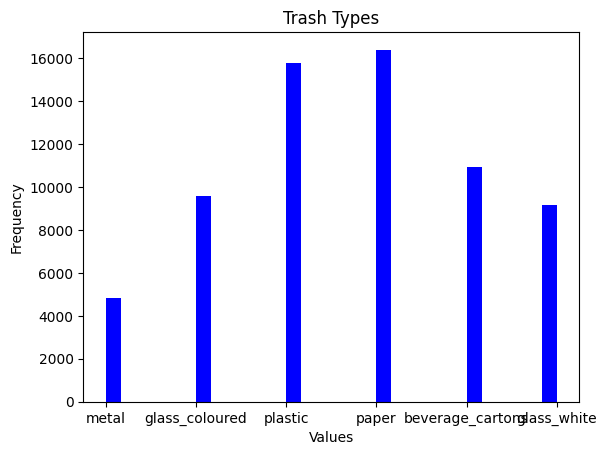

In [169]:
# Histogram 
plt.hist(data["trash_type"], bins=30, color='blue')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Trash Types")
plt.show()

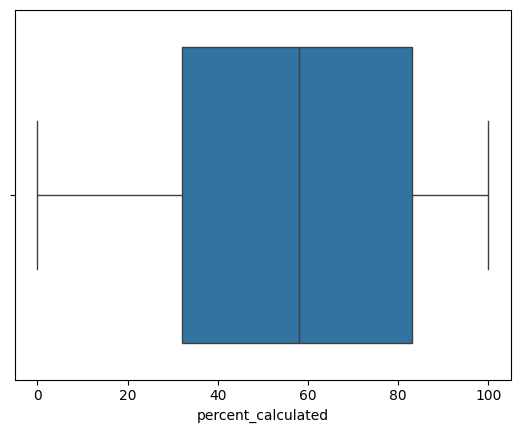

In [26]:
sns.boxplot(x=data["percent_calculated"])
plt.show()

In [170]:
# Zjištění předchozí naměřené hodnoty
data["prev_percent"] = df.groupby("container_id")["percent_calculated"].shift(1) 

# Identifikace uskutečnení odvozu odpadu
data["waste_removed"] = (data["prev_percent"] - data["percent_calculated"] >= 5) & (data["percent_calculated"] < 50)

# Identifikace poslední naměřené hodnoty zaplněnosti každého kontejnerů před svozem odpadu
data["pre_removal_percent"] = data["prev_percent"].where(data["waste_removed"])

In [171]:
# Identifikace času odvozu odpadu
data["waste_removal_time"] = data["measured_at"].where(data["waste_removed"])

In [173]:
# Filtrace dat pro zahrnutí pouze skleněných typů odpadů 'glass_coloured' a 'glass_white'
glass_data = data[data["trash_type"].isin(["glass_coloured", "glass_white"])]

# Kontrola výsledků
print(glass_data.head())
print(glass_data["trash_type"].unique()) 
print(glass_data.info())

        id_x  container_id       code_x  percent_calculated  upturned  \
3   11675949         30142  S0135C01353                  32         0   
9   11675799         29990  S0033C00334                  73         0   
13  11675742         30149  S0136C01364                  48         0   
15  11675734         30078  S0057C00573                   0         0   
17  11675732         30037  S0049C00496                  61         0   

    temperature  battery_status               measured_at  \
3            15            3.77 2019-03-30 18:00:17+00:00   
9            13            3.60 2019-03-30 17:45:09+00:00   
13           16            3.60 2019-03-30 17:30:56+00:00   
15           19            3.60 2019-03-30 17:29:50+00:00   
17           13            3.60 2019-03-30 17:29:48+00:00   

             measured_at_utc              prediction_x  ...      trash_type  \
3  2019-03-30 18:00:17+00:00                       NaT  ...  glass_coloured   
9  2019-03-30 17:45:09+00:00 2019-04

In [21]:
# Změna datového typu na datetime v glass_data
glass_data = glass_data.copy()
glass_data["measured_at"] = pd.to_datetime(glass_data["measured_at"])
glass_data["measured_at_utc"] = pd.to_datetime(glass_data["measured_at_utc"])

In [176]:
glass_data.dtypes

id_x                                   int64
container_id                           int64
code_x                                object
percent_calculated                     int64
upturned                               int64
temperature                            int64
battery_status                       float64
measured_at              datetime64[ns, UTC]
measured_at_utc          datetime64[ns, UTC]
prediction_x             datetime64[ns, UTC]
prediction_utc           datetime64[ns, UTC]
firealarm                              int64
id_y                                   int32
code_y                                object
latitude                             float64
longitude                            float64
address                               object
district                              object
postal_code                           object
total_volume                           int32
trash_type                            object
prediction_y             datetime64[ms, UTC]
bin_type  

In [67]:
if isinstance(glass_data, gpd.GeoDataFrame):
    print("glass_data je GeoDataFrame")
else:
    print("glass_data je DataFrame")

glass_data je DataFrame


In [68]:
# Převod DataFrame na GeoDataFrame
glass_data = gpd.GeoDataFrame(glass_data)

In [69]:
if isinstance(glass_data, gpd.GeoDataFrame):
    print("glass_data je GeoDataFrame")
else:
    print("glass_data je DataFrame")

glass_data je GeoDataFrame


In [177]:
data.to_csv("data.csv", index=False)

In [178]:
glass_data.to_csv("glass_data.csv", index=False)

In [36]:
# Průměrné plnění kontejnerů se sklem po hodinách - tabulka
glass_data["measured_hour"] = glass_data["measured_at"].dt.hour
avg_filling_by_hour = glass_data.groupby(["measured_hour", "trash_type"])["percent_calculated"].mean().unstack()
print(avg_filling_by_hour)

trash_type     glass_coloured  glass_white
measured_hour                             
4                   48.305263    66.954545
5                   47.392810    40.604240
6                   58.890411    38.183333
7                   47.528710    43.029954
8                   46.547619    41.745902
9                   46.819926    38.845185
10                  50.255034    57.751634
11                  46.292632    40.214961
12                  53.840000    36.260870
13                  46.666229    42.060000
14                  61.796610    43.845070
15                  43.093750    60.791946
16                  44.500000    34.000000
17                  46.625468    42.233466
18                  51.951613    40.640000
19                  26.000000    45.869565
20                  64.600000    69.000000
21                        NaN    54.857143


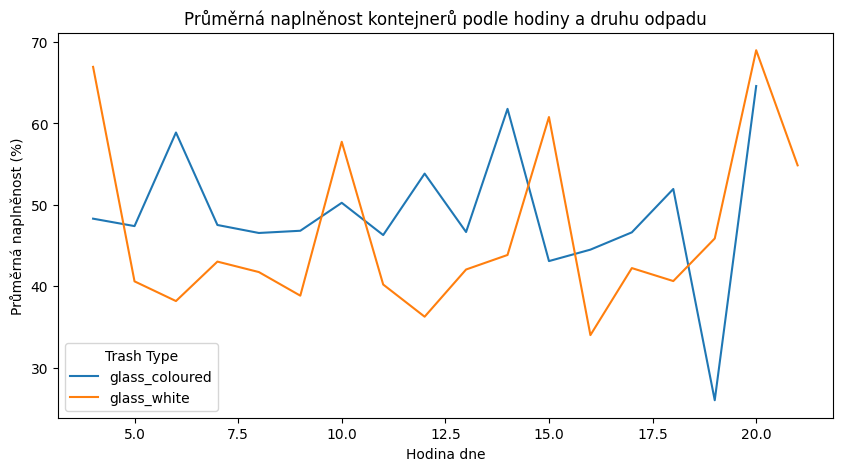

In [37]:
# Průměrné plnění kontejnerů se sklem po hodinách - graf
avg_filling_by_hour.plot(kind="line", figsize=(10, 5))
plt.xlabel("Hodina dne")
plt.ylabel("Průměrná naplněnost (%)")
plt.title("Průměrná naplněnost kontejnerů podle hodiny a druhu odpadu")
plt.legend(title="Trash Type")
plt.show()

In [52]:
# Průměrné plnění kontejnerů na sklo podle dne v týdnu - tabulka
glass_data["day_of_week"] = glass_data["measured_at"].dt.strftime("%A")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
glass_data["day_of_week"] = pd.Categorical(glass_data["day_of_week"], categories=day_order, ordered=True)
avg_filling_by_day_of_week = glass_data.groupby(["day_of_week", "trash_type"], observed=True)["percent_calculated"].mean().unstack()
print(avg_filling_by_day_of_week)

trash_type   glass_coloured  glass_white
day_of_week                             
Monday            49.241190    44.112688
Tuesday           49.803843    44.562399
Wednesday         49.790551    42.129112
Thursday          44.624518    39.545012
Friday            44.996904    39.951456
Saturday          45.400249    41.154153
Sunday            47.196032    44.194647


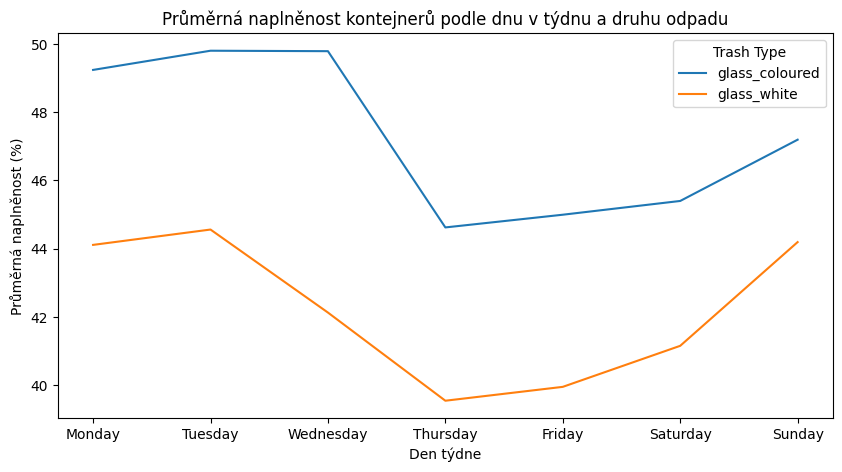

In [54]:
# Průměrné plnění kontejnerů na sklo podle dne v týdnu - graf
avg_filling_by_day_of_week.plot(kind="line", figsize=(10, 5))
plt.xlabel("Den týdne")
plt.ylabel("Průměrná naplněnost (%)")
plt.title("Průměrná naplněnost kontejnerů podle dnu v týdnu a druhu odpadu")
plt.legend(title="Trash Type")
plt.show()

In [131]:
# 5 nejčastěji přeplněných kontejnerů
overfilled_containers = (
    glass_data[glass_data["pre_removal_percent"] >= 100]
    .groupby("container_id")
    .size()
    .reset_index(name="Počet přeplnění")  # Přidání sloupce "count" s počtem přeplnění
    .sort_values(by="Počet přeplnění", ascending=False)
    .head(10)
    )
print("5 nejčastěji přeplněných kontejnerů:")
print(overfilled_containers.head(5))  # 5 nejčastěji přeplněných kontejnerů

5 nejčastěji přeplněných kontejnerů:
    container_id  Počet přeplnění
8          29926                2
9          29931                2
11         29935                2
4          29881                2
12         29981                2


In [149]:
# 5 kontejnerů s nejmenším zaplněním
average_pre_removal = (
    glass_data.groupby("container_id")["pre_removal_percent"]
    .mean()
    .reset_index(name="Průměrné naplnění před vyprázdněním")
    .sort_values(by="Průměrné naplnění před vyprázdněním", ascending=True)  # Sort in ascending order
    .head(5)  # Get the 5 lowest values
)
print("5 kontejnerů s nejmenším zaplněním:")
print(average_pre_removal.head(5))

5 kontejnerů s nejmenším zaplněním:
    container_id  Průměrné naplnění před vyprázdněním
4          29797                                 6.00
84         30074                                 7.00
37         29944                                13.50
19         29880                                17.40
96         30105                                18.75
